In [6]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import math
from PIL import Image

In [7]:
# import pretrained models
alexnet = torchvision.models.alexnet(pretrained = True)
resnet = torchvision.models.resnet50(pretrained = True)
vgg = torchvision.models.vgg16(pretrained = True)

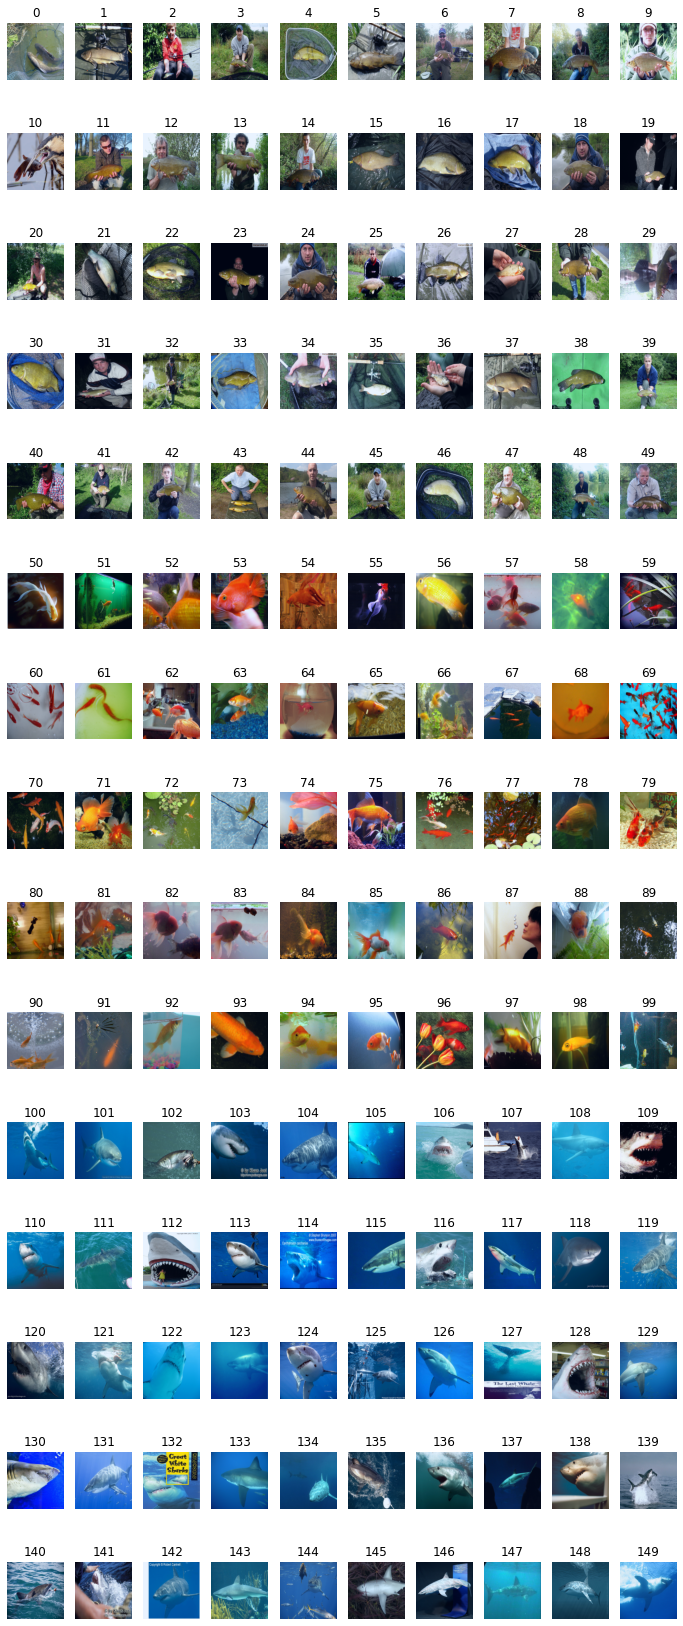

In [8]:
# import test data

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

transform_ = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

folder_dir = 'ILSVRC2012_img_val'
data_test =  datasets.ImageFolder(root = folder_dir, transform = transform_,
                                       target_transform = None)

# show the test images

plt.figure(figsize = (12, math.ceil(len(data_test)/5)))
for i in range(len(data_test)):
    img = data_test[i][0].permute(1, 2, 0)
    img_norm = (img - img.min()) / (img.max() - img.min())
    plt.subplot(math.ceil(len(data_test)/10), 10, i+1)
    plt.imshow(img_norm)
    plt.title(i)
    plt.axis('off')
plt.show()

In [9]:
# make prediction

pred_alexnet = []
pred_resnet = []
pred_vgg = []

alexnet.eval()
resnet.eval()
vgg.eval()

with open("imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i,x in json.load(f).items()}

for data in iter(data_test):
    img = data[0].unsqueeze(0)
    
    pred = alexnet(img)
    pred_class = str(imagenet_classes[pred.max(dim=1)[1].item()])
    pred_alexnet.append(pred_class)

    pred = resnet(img)
    pred_class = str(imagenet_classes[pred.max(dim=1)[1].item()])
    pred_resnet.append(pred_class)
    
    pred = vgg(img)
    pred_class = str(imagenet_classes[pred.max(dim=1)[1].item()])
    pred_vgg.append(pred_class)

In [10]:
# record errors made

err_alexnet = {'tench':[],
              'goldfish':[],
              'great_white_shark':[]}
err_resnet = {'tench':[],
              'goldfish':[],
              'great_white_shark':[]}
err_vgg = {'tench':[],
              'goldfish':[],
              'great_white_shark':[]}

for i in range(len(pred_alexnet)):
    if pred_alexnet[i] != imagenet_classes[data_test[i][1]]:
        err_alexnet[imagenet_classes[data_test[i][1]]].append((i, pred_alexnet[i]))
    if pred_resnet[i] != imagenet_classes[data_test[i][1]]:
        err_resnet[imagenet_classes[data_test[i][1]]].append((i, pred_resnet[i]))
    if pred_vgg[i] != imagenet_classes[data_test[i][1]]:
        err_vgg[imagenet_classes[data_test[i][1]]].append((i, pred_vgg[i]))

print('errors made by alexnet: ' + '\n')
print(err_alexnet)
print('\n' + 'errors made by resnet: ' + '\n')
print(err_resnet)
print('\n' + 'errors made by vgg: ' + '\n')
print(err_vgg)

errors made by alexnet: 

{'tench': [(1, 'rifle'), (2, 'ice_lolly'), (10, 'hermit_crab'), (20, 'mountain_bike'), (21, 'coho'), (29, 'stingray'), (31, 'sturgeon'), (32, 'chain_saw'), (35, 'cardigan'), (36, 'alligator_lizard'), (38, 'sturgeon')], 'goldfish': [(50, 'anemone_fish'), (51, 'toaster'), (54, 'shower_curtain'), (55, 'stage'), (59, 'toucan'), (61, 'whistle'), (64, 'eggnog'), (67, 'snorkel'), (68, "jack-o'-lantern"), (73, 'ant'), (79, 'hermit_crab'), (80, 'bathtub'), (87, 'hand_blower'), (96, 'hip')], 'great_white_shark': [(100, 'hammerhead'), (103, 'tiger_shark'), (105, 'electric_ray'), (107, 'trimaran'), (110, 'hammerhead'), (112, 'airship'), (113, 'tiger_shark'), (114, 'killer_whale'), (117, 'hammerhead'), (118, 'tiger_shark'), (121, 'snorkel'), (122, 'tiger_shark'), (127, 'hammerhead'), (130, 'tiger_shark'), (132, 'vending_machine'), (133, 'tiger_shark'), (134, 'loggerhead'), (137, 'hammerhead'), (138, 'albatross'), (139, 'killer_whale'), (142, 'dugong'), (143, 'tiger_shark')


Errors made on tench by: 


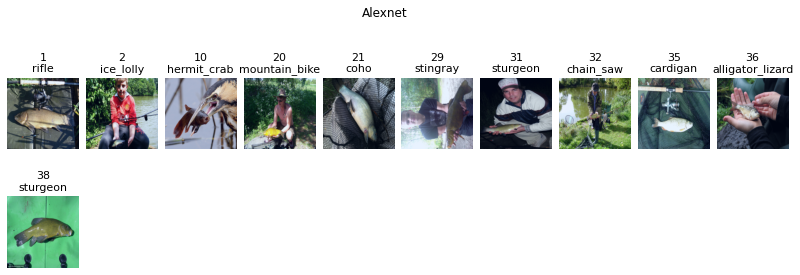

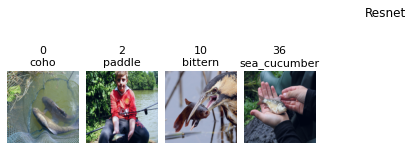

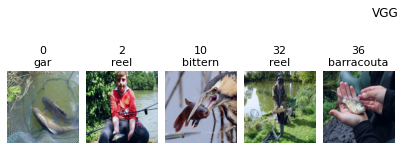


Errors made on goldfish by: 


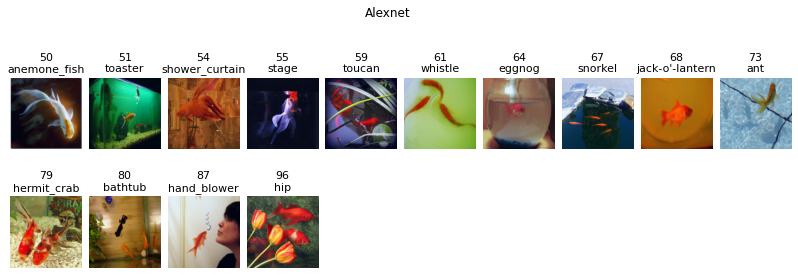

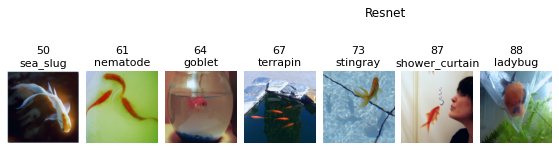

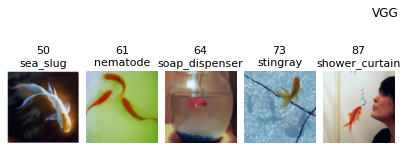


Errors made on great_white_shark by: 


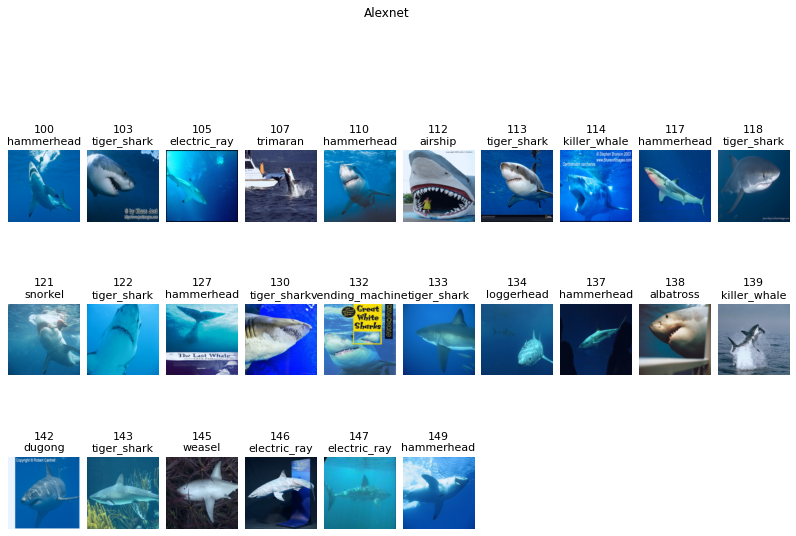

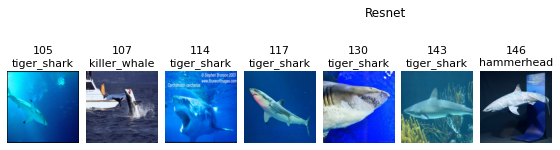

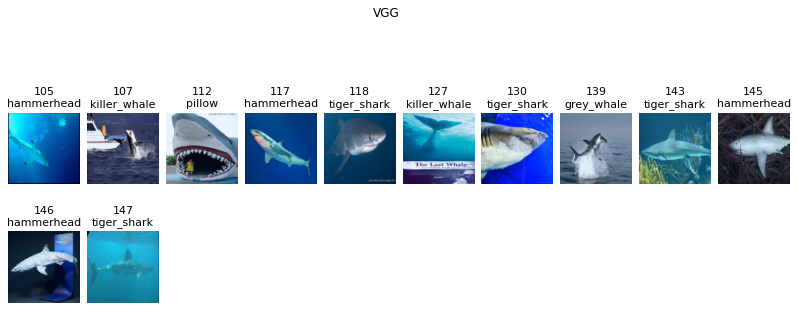

In [11]:
# plot the errors made by alexnet and resnet, the titles represent the false predictions

for class_name in err_alexnet.keys():
    
    print('\n' + '\033[1m' + 'Errors made on {} by: '.format(class_name))
    fig = plt.figure(figsize = (14, math.ceil(len(err_alexnet[class_name])/3.5)))
    plt.suptitle('Alexnet', y = 1.08)
    plt.subplots_adjust(wspace = 0.1, hspace = 0.2)
    for i, data in enumerate(err_alexnet[class_name]):
        num, false_pred = data[0], data[1]
        img = data_test[num][0].permute(1, 2, 0)
        img_norm = (img - img.min()) / (img.max() - img.min())
        plt.subplot(math.ceil(len(err_alexnet[class_name])/10), 10, i+1)
        plt.imshow(img_norm)
        plt.title(str(num) + '\n' + false_pred, fontsize = 11)
        plt.axis('off')
    plt.show()    

    fig = plt.figure(figsize = (14, math.ceil(len(err_resnet[class_name])/3.5)))
    plt.suptitle('Resnet', y = 1.2)
    plt.subplots_adjust(wspace = 0.1, hspace = 0.2)
    for i, data in enumerate(err_resnet[class_name]):
        num, false_pred = data[0], data[1]
        img = data_test[num][0].permute(1, 2, 0)
        img_norm = (img - img.min()) / (img.max() - img.min())
        plt.subplot(math.ceil(len(err_resnet[class_name])/10), 10, i+1)
        plt.imshow(img_norm)
        plt.title(str(num) + '\n' + false_pred, fontsize = 11)
        plt.axis('off')
    plt.show()
    
    fig = plt.figure(figsize = (14, math.ceil(len(err_vgg[class_name])/3.5)))
    plt.suptitle('VGG', y = 1.2)
    plt.subplots_adjust(wspace = 0.1, hspace = 0.2)
    for i, data in enumerate(err_vgg[class_name]):
        num, false_pred = data[0], data[1]
        img = data_test[num][0].permute(1, 2, 0)
        img_norm = (img - img.min()) / (img.max() - img.min())
        plt.subplot(math.ceil(len(err_vgg[class_name])/10), 10, i+1)
        plt.imshow(img_norm)
        plt.title(str(num) + '\n' + false_pred, fontsize = 11)
        plt.axis('off')
    plt.show()

Testing the performance on stylized images

In [12]:
sti_name = 'filled-silhouettes'
# class_name = 'bear'

data_dir = 'texture-vs-shape-master/stimuli/' # + sti_name  + '/' + class_name + '/'

data_sti =  datasets.ImageFolder(root = data_dir, transform = transform_,
                                       target_transform = None)

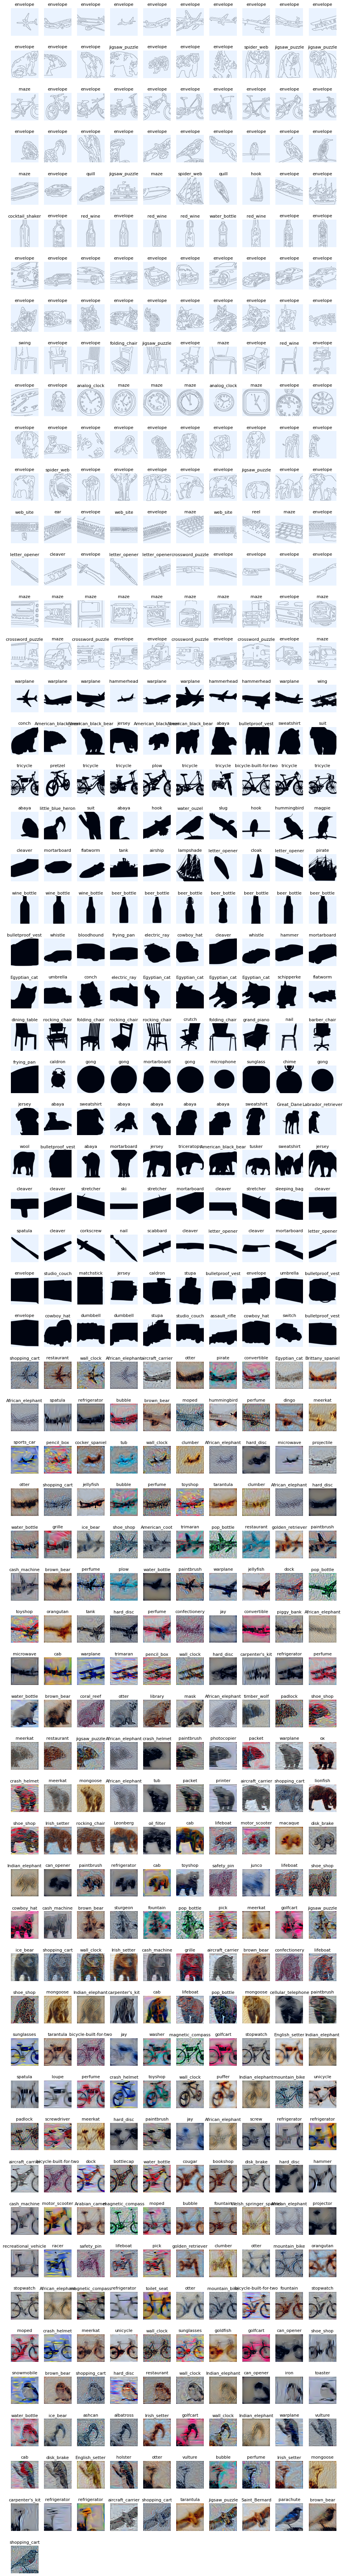

In [29]:
resnet.eval()
# pred_alex = []
plt.figure(figsize = (15, math.ceil(len(data_sti)/5)))

for i, data in enumerate(data_sti):
    img = data[0]
    pred = resnet(img.unsqueeze(0))
    pred_class = str(imagenet_classes[pred.max(dim=1)[1].item()])
    img_norm = (img - img.min()) / (img.max() - img.min())
    plt.subplot(math.ceil(len(data_sti)/10), 10, i+1)
    plt.imshow(img_norm.permute(1, 2, 0))
    plt.title(pred_class, fontsize = 11)
    plt.axis('off')
    if i == 600:
        break
plt.show()

In [ ]:
# deleted codes

"""
preprocess = transforms.Compose([
   transforms.Resi
   \ze((224, 224)),
   transforms.ToTensor(),
])

class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return (x - self.mean.type_as(x)[None,:,None,None]) / self.std.type_as(x)[None,:,None,None]

norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

data_dir = 'ILSVRC2012_img_val/ILSVRC2012_val_00000008.JPEG'
test_img = Image.open(data_dir)
test_img = preprocess(test_img)[None,:,:,:]
test_img_norm = norm(test_img)

plt.imshow(test_img[0].numpy().transpose(1,2,0))

alexnet.eval()

pred = alexnet(test_img_norm)
_, predicted = torch.max(pred, 1)

with open("imagenet_class_index.json") as f:
    imagenet_classes = {int(i):x[1] for i,x in json.load(f).items()}
print('predicted label:{} '.format(int(predicted)) + str(imagenet_classes[pred.max(dim=1)[1].item()]))
print('true label:{} '.format(int(labels[0][7])) + str(imagenet_classes[int(labels[0][7])]))
"""